<a href="https://colab.research.google.com/github/vranes/pascal-interpreter/blob/main/Lexer-Parser-Grapher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parser

[Parser](https://en.wikipedia.org/wiki/Parsing) jer deo kompajlera koji na osnovu niza tokena formira [apstraktno sintaksno stablo (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree). AST je [n-arno stablo](https://en.wikipedia.org/wiki/M-ary_tree) čiji čvorovi predstavljaju semantičke strukture sastavljene od pojedinačnih tokena. Parser će pročitati niz tokena i to je jedini put kada će se to uraditi u čitavom procesu kompajliranja. Naredne faze kompajliranja zahtevaju samo formirano stablo.

![pp-01](https://i.postimg.cc/SNmFQ6X0/pp-01.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from enum import Enum, auto

In [ ]:
class Class(Enum):
    TYPE          = auto()
    ID            = auto()
    INT           = auto()
    REAL          = auto()
    BOOLEAN       = auto()
    CHAR          = auto()
    STRING        = auto()
    ARRAY         = auto()    # ?
    OF            = auto()

    PLUS          = auto()
    MINUS         = auto()
    ASTERISK      = auto()  # mnozenje
    DIV           = auto()  # celobrojno deljenje
    FWDSLASH      = auto()  # decimalno deljenje
    MOD           = auto()

    ABS           = auto()
    ROUND         = auto()
    INC           = auto()
    DEC           = auto()

    NOT = auto()
    AND = auto()
    OR = auto()
    XOR = auto()

    EQ = auto()             # =
    NEQ = auto()            # <>
    LT = auto()
    GT = auto()
    LTE = auto()
    GTE = auto()

    LPAREN        = auto()
    RPAREN        = auto()
    LBRACKET      = auto()
    RBRACKET      = auto()
    RANGE         = auto()

    COMMA         = auto()
    DOT           = auto()
    COLON         = auto()
    SEMICOLON     = auto()
    ASSIGN        = auto()      # :=

    VAR           = auto()  
    PROCEDURE     = auto()
    FUNCTION      = auto()
    EXIT          = auto()
    BEGIN         = auto()
    END           = auto()     

    IF            = auto()
    THEN          = auto()
    ELSE          = auto()

    FOR           = auto()
    TO            = auto()
    DO            = auto()
    WHILE         = auto()
    REPEAT        = auto()
    UNTIL         = auto()
    BREAK         = auto()
    CONTINUE      = auto()

    EOF           = auto()



In [ ]:
class Token:
    def __init__(self, class_, lexeme):
        self.class_ = class_
        self.lexeme = lexeme

    def __str__(self):
        return "<{} {}>".format(self.class_, self.lexeme)

In [ ]:
class Lexer:
    def __init__(self, text):
        self.text = text
        self.len = len(text)
        self.pos = -1

    def read_space(self):
        while self.pos + 1 < self.len and self.text[self.pos + 1].isspace():
            self.next_char()

    def read_num(self):
        lexeme = self.text[self.pos]
        while self.pos + 1 < self.len and self.text[self.pos + 1].isdigit():
            lexeme += self.next_char()
        if self.text[self.pos + 1] == '.' and self.text[self.pos + 2] != '.':
            lexeme += self.next_char()
            return read_real(lexeme)
        return Token(Class.INT, int(lexeme)) 

    def read_real(self, lexeme):
        while self.pos + 1 < self.len and self.text[self.pos + 1].isdigit():
            lexeme += self.next_char()
        return Token(Class.REAL, real(lexeme))

    def read_char(self): 
        self.pos += 1
        lexeme = self.text[self.pos]
        self.pos += 1
        return lexeme

    def read_string(self): 
        lexeme = ''
        while self.pos + 1 < self.len and self.text[self.pos + 1] != '\'':
            lexeme += self.next_char()
        self.pos += 1
        return lexeme

    def read_keyword(self):
        lexeme = self.text[self.pos]
        while self.pos + 1 < self.len and self.text[self.pos + 1].isalnum():
            lexeme += self.next_char()
        if lexeme == 'begin':
            return Token(Class.BEGIN, lexeme)
        elif lexeme == 'end':                           
            return Token(Class.END, lexeme)
        elif lexeme == 'procedure':
            return Token(Class.PROCEDURE, lexeme)
        elif lexeme == 'function':
            return Token(Class.FUNCTION, lexeme)
        elif lexeme == 'exit':
            return Token(Class.EXIT, lexeme)
        elif lexeme == 'var':
            return Token(Class.VAR, lexeme)
        elif lexeme == 'div':
            return Token(Class.DIV, lexeme)
        elif lexeme == 'mod':
            return Token(Class.MOD, lexeme)
        elif lexeme == 'true' or lexeme == 'false':
            return Token(Class.BOOLEAN, lexeme)
        elif lexeme == 'not':
            return Token(Class.NOT, lexeme)
        elif lexeme == 'and':
            return Token(Class.AND, lexeme)
        elif lexeme == 'or':
            return Token(Class.OR, lexeme)
        elif lexeme == 'xor':
            return Token(Class.XOR, lexeme)
        elif lexeme == 'array':
            return Token(Class.ARRAY, lexeme)
        elif lexeme == 'of':
            return Token(Class.OF, lexeme)
        elif lexeme == 'if':
            return Token(Class.IF, lexeme)
        elif lexeme == 'then':
            return Token(Class.THEN, lexeme)
        elif lexeme == 'else':
            return Token(Class.ELSE, lexeme)
        elif lexeme == 'while':
            return Token(Class.WHILE, lexeme)
        elif lexeme == 'for':
            return Token(Class.FOR, lexeme)
        elif lexeme == 'to':
            return Token(Class.TO, lexeme)
        elif lexeme == 'do':
            return Token(Class.DO, lexeme)
        elif lexeme == 'repeat':
            return Token(Class.REPEAT, lexeme)
        elif lexeme == 'until':
            return Token(Class.UNTIL, lexeme)
        elif lexeme == 'Break':
            return Token(Class.BREAK, lexeme)
        elif lexeme == 'Continue':
            return Token(Class.CONTINUE, lexeme)
        elif lexeme == 'return':
            return Token(Class.RETURN, lexeme)
        elif lexeme == 'integer' or lexeme == 'real' or lexeme == 'char' or lexeme == 'string' or lexeme == 'boolean':
            return Token(Class.TYPE, lexeme)
        return Token(Class.ID, lexeme)

    def next_char(self):
        self.pos += 1
        if self.pos >= self.len:
            return None
        return self.text[self.pos]

    def peek(self, step):
        peek_pos = self.pos + step
        if peek_pos >= self.len:
            return None
        return self.text[peek_pos]   

    def next_token(self):
        self.read_space()
        curr = self.next_char()
        if curr is None:
            return Token(Class.EOF, curr)
        token = None
        if curr.isalpha():
            token = self.read_keyword()
        elif curr.isdigit():
            token = self.read_num()
        elif curr == ':' and self.peek(1) == '=':
                self.next_char()
                token = Token(Class.ASSIGN, ':=')
        elif curr == '\'':
            self.pos += 1
            if self.peek(1) == '\'':
                self.pos -= 1
                token = Token(Class.CHAR, self.read_char())
            else:
                self.pos -= 1
                token = Token(Class.STRING, self.read_string())
        elif curr == '+':
            token = Token(Class.PLUS, curr)
        elif curr == '-':
            token = Token(Class.MINUS, curr)
        elif curr == '*':
            token = Token(Class.ASTERISK, curr)
        elif curr == '/':
            token = Token(Class.FWDSLASH, curr)
        elif curr == '%':
            token = Token(Class.PERCENT, curr)
        elif curr == '=':
                token = Token(Class.EQ, '=')
        elif curr == '<':
            if self.peek(1) == '=':
                self.next_char()
                token = Token(Class.LTE, '<=')
            elif self.peek(1) == '>':
                self.next.char()
                token = Token(Class.NEQ, '<>')
            else:
                token = Token(Class.LT, '<')
        elif curr == '>':
            if self.peek(1) == '=':
                self.next_char()
                token = Token(Class.GTE, '>=')
            else:
                token = Token(Class.GT, '>')
        elif curr == '(':
            token = Token(Class.LPAREN, curr)
        elif curr == ')':
            token = Token(Class.RPAREN, curr)
        elif curr == '[':
            token = Token(Class.LBRACKET, curr)
        elif curr == ']':
            token = Token(Class.RBRACKET, curr)
        elif curr == ';':
            token = Token(Class.SEMICOLON, curr)
        elif curr == ':':
            token = Token(Class.COLON, curr)
        elif curr == ',':
            token = Token(Class.COMMA, curr)
        elif curr == '.':
            token = Token(Class.DOT, curr)
            if self.peek(1) == '.':
                self.next_char()
                token = Token(Class.RANGE, '..')
        else:
            self.die(curr)
        return token

    def lex(self):
        tokens = []
        while True:
            curr = self.next_token()
            tokens.append(curr)
            if curr.class_ == Class.EOF:
                break
        return tokens

    def die(self, char):
        raise SystemExit("Unexpected character: {}".format(char))

Klasa **Node** predstavlja baznu klasu za formiranje AST, a klase koje je nasleđuju odgovaraju svakoj ispravnoj semantičkoj strukturi.

In [ ]:
class Node():
    pass

class Program(Node):
    def __init__(self, block):      
        self.block = block

class Block(Node):
    def __init__(self, decl_block, compound_statement):
        self.decl_block = decl_block
        self.compound_statement = compound_statement

class DeclBlock(Node):
    def __init__(self, nodes):      
        self.nodes = nodes

class VarBlock(Node):
    def __init__(self, nodes):      
        self.nodes = nodes

class VarDecl(Node):                   
    def __init__(self, type_, id_, assign):
        self.type_ = type_
        self.id_ = id_
        self.assign = assign

class StringDecl(Node):                   
    def __init__(self, type_, id_, size):
        self.type_ = type_
        self.id_ = id_
        self.size = size

class ArrayDecl(Node):
    def __init__(self, type_, id_, low, high, elems):
        self.type_ = type_
        self.id_ = id_
        self.low = low
        self.high = high
        self.elems = elems

class ProcDecl(Node):
    def __init__(self, id_, params, block):
        self.id_ = id_
        self.params = params
        self.block = block

class FuncDecl(Node):
    def __init__(self, type_, id_, params, block):
        self.type_ = type_
        self.id_ = id_
        self.params = params
        self.block = block

class CompoundStatement(Node):
    def __init__(self, nodes):
      self.nodes = nodes

class If(Node):
    def __init__(self, cond, true, false):
        self.cond = cond
        self.true = true
        self.false = false

class For(Node):                        # down to obraditi
    def __init__(self, init, limit, step, compound_statement):
        self.init = init
        self.limit = limit
        self.step = step
        self.compound_statement = compound_statement

class While(Node):
    def __init__(self, cond, compound_statement): 
        self.cond = cond
        self.compound_statement = compound_statement

class RepeatUntil(Node):
    def __init__(self, cond, statements):
        self.cond = cond
        self.statements = statements

class FuncCall(Node):
    def __init__(self, id_, args):
        self.id_ = id_
        self.args = args

class ProcCall(Node):
    def __init__(self, id_, args):
        self.id_ = id_
        self.args = args

class Assign(Node):
    def __init__(self, id_, expr): 
        self.id_ = id_
        self.expr = expr

class Params(Node):
    def __init__(self, params):
        self.params = params

class VarParam(Node):                   
    def __init__(self, type_, id_):
        self.type_ = type_
        self.id_ = id_

class ValueParam(Node):                   
    def __init__(self, type_, id_):
        self.type_ = type_
        self.id_ = id_

class Args(Node):
    def __init__(self, args):
        self.args = args

class ArrayElem(Node):
    def __init__(self, id_, index):
        self.id_ = id_
        self.index = index

class Elems(Node):      
    def __init__(self, elems):
        self.elems = elems

class Break(Node):
    pass

class Continue(Node):
    pass

class Exit(Node):
    pass

class Type(Node):                       # int, char etc
    def __init__(self, value):
        self.value = value

class Int(Node):                        # int value
    def __init__(self, value):
        self.value = value

class Real(Node):
    def __init__(self, value):
        self.value = value

class Boolean(Node):
    def __init__(self, value):
        self.value = value

class Char(Node):
    def __init__(self, value):
        self.value = value

class String(Node):
    def __init__(self, value):
        self.value = value

class Id(Node):
    def __init__(self, value):
        self.value = value

class BinOp(Node):
    def __init__(self, first, symbol, second):
        self.first = first
        self.symbol = symbol
        self.second = second

class UnOp(Node):
    def __init__(self, symbol, first):      
        self.symbol = symbol
        self.first = first

Klasa **Visitor** predstavlja baznu klasu za obilazak AST.

Metoda **visit** u trenutnom objektu traži metodu koja odgovara tipu prosleđenog čvora.

Metoda **die** se koristi u slučaju da tražena metoda ne postoji, tj. u slučaju kada je potrebno obići čvor čiji tip nije podržan.

**getattr**(object, name[, default]):

Return the value of the named attribute of object. Name must be a string. If the string is the name of one of the object’s attributes, the result is the value of that attribute. For example, getattr(x, 'foobar') is equivalent to x.foobar. If the named attribute does not exist, default is returned if provided, otherwise AttributeError is raised.

In [ ]:
class Visitor():
    def visit(self, parent, node):
        method = 'visit_' + type(node).__name__
        visitor = getattr(self, method, self.die)
        return visitor(parent, node)

    def die(self, parent, node):
        method = 'visit_' + type(node).__name__
        raise SystemExit("Missing method: {}".format(method))

Importovanje neophodnih modula za čuvanje unutrašnjeg stanja objekta.

In [ ]:
from functools import wraps
import pickle

Klasa **Parser** sadrži metode za semantičku analizu izvornog koda koje će iz prosleđenog [FIFO niza](https://en.wikipedia.org/wiki/FIFO_(computing_and_electronics)) tokena formirati AST čvor po čvor.

Metoda **parse** formira AST pomoću [Visitor dizajn šablona](https://sourcemaking.com/design_patterns/visitor) pozivom metode **program**.

Metoda **program** konstruiše AST čvor za deklaraciju globalnih promenljivih i implementaciju funkcija.

Metoda **id_** konstruiše AST čvor za identifikator.

Metoda **decl** konstruiše AST čvor za deklaraciju skalarne promenljive, niza ili funkcije.

Metoda **if_** konstruiše AST čvor za ispitivanje uslova, blok koji se izvršava u slučaju da je uslov tačan i opcioni blok koji se izvršava u slučaju da uslov nije tačan.

Metoda **while_** konstruiše AST čvor za ispitivanje uslova i blok koji se izvršava sve dok je uslov tačan.

Metoda **for_** konstruiše AST čvor za inicijalizaciju iteratora, ispitivanje uslova, inkrementiranje iteratora i blok koji se izvršava sve dok je uslov tačan.

Metoda **block** konstruiše AST čvor za blok instrukcija koje se izvršavaju u okviru neke semantičke celine.

Metoda **params** konstruiše AST čvor za deklarisane parametre funkcije. Svaki parametar ima naziv i tip.

Metoda **args** konstruiše AST čvor za prosleđene argumente pozivu funkcije. Svaki argument ima naziv i vrednost.

Metoda **elems** konstruiše AST čvor za definisane elemente pri inicijalizaciji niza.

Metoda **return_** konstruiše AST čvor za prekid funkcije uz opciono vraćanje vrednosti.

Metoda **break_** konstruiše AST čvor za prekid petlje.

Metoda **continue_** konstruiše AST čvor za skok na sledeću iteraciju petlje.

Metoda **type_** konstruiše AST čvor za tip podataka, tj. "int", "char" ili "void".

Metoda **factor** konstruiše AST čvor za matematičke operacije visokog prioriteta, tj. unarne operacije.

Metoda **term** konstruiše AST čvor za matematičke operacije srednjeg prioriteta, tj. multiplikativne operacije.

Metoda **expr** konstruiše AST čvor za matematičke operacije niskog prioriteta, tj. aditivne operacija.

Metoda **compare** konstruiše AST čvor za poređenje dva logička operanda.

Metoda **logic** konstruiše AST čvor za logičku konjunkciju i disjunkciju.

Metoda **eat** uzima token za početka niza i proverava da li njegova klasa odgovara prosleđenoj klasi.

Metoda **is_func_call** proverava da li trenutni identifikator odgovara pozivu ili implementaciji funkcije. Nakon provere vraća parser u originalno stanje.

Metoda **restorable** se dodaje kao anotacija drugoj metodi koja menja unutrašnje stanje objekta, a potrebno je da se objekat po završetku funkcije vrati u originalno stanje.

Metoda **die** se koristi u slučaju da se dogodi bilo koja greška.

Metoda **die_deriv** se koristi u slučaju da pročitani token ne odgovara sementičkoj strukturi koja se trenutno formira.

Metoda **die_type** se koristi u slučaju da klasa tokena sa početka niza ne odgovara klasi prosleđenoj pozivu metode **eat**.

In [ ]:
class Parser:
    def __init__(self, tokens):
        self.tokens = tokens
        self.curr = tokens.pop(0)
        self.prev = None

    def restorable(call):
        @wraps(call)
        def wrapper(self, *args, **kwargs):
            state = pickle.dumps(self.__dict__)
            result = call(self, *args, **kwargs)
            self.__dict__ = pickle.loads(state)
            return result
        return wrapper

    def eat(self, class_):
        if self.curr.class_ == class_:
            self.prev = self.curr
            self.curr = self.tokens.pop(0)
        else:
            self.die_type(class_.name, self.curr.class_.name, self.curr.lexeme, self.tokens[0].lexeme)

    def program(self):
        block = self.block()
        self.eat(Class.DOT)                                             # eof?
        return Program(block)

    def block(self):
        decl_block = self.decl_block()
        compound_statement = self.compound_statement()
        return Block(decl_block, compound_statement)

    def decl_block(self):
        decl_block = []
        while self.curr.class_ == Class.VAR or self.curr.class_ == Class.PROCEDURE or self.curr.class_ == Class.FUNCTION:
            if self.curr.class_ == Class.VAR:
                self.eat(Class.VAR)
                var_decl = []
                while self.curr.class_ == Class.ID:         
                    var_decl.extend(self.var_decl())
                    self.eat(Class.SEMICOLON)
                decl_block.append(VarBlock(var_decl))
            if self.curr.class_ == Class.PROCEDURE:
                self.eat(Class.PROCEDURE)
                proc_decl = self.proc_decl()                                     
                decl_block.append(proc_decl)
                self.eat(Class.SEMICOLON)
            if self.curr.class_ == Class.FUNCTION:                           
                self.eat(Class.FUNCTION)
                func_decl = self.func_decl()                                 
                decl_block.append(func_decl)
                self.eat(Class.SEMICOLON)
        return decl_block

    def var_decl(self):
        id_arr = []
        id_arr.append(self.id_())                                            
        while self.curr.class_ == Class.COMMA:
            self.eat(Class.COMMA)
            id_arr.append(self.id_())
        self.eat(Class.COLON)
        if self.curr.class_ == Class.TYPE:
            type_ = self.type_()
            assign = None
            if type_.value == "string":
                size = None
                if self.curr.class_ == Class.LBRACKET:
                    self.eat(Class.LBRACKET)
                    if self.curr.class_ != Class.RBRACKET:
                        size = self.expr()                                       
                    self.eat(Class.RBRACKET)
                str_decl_arr = [StringDecl(type_, id_, size) for id_ in id_arr]
                return str_decl_arr
            if self.curr.class_ == Class.EQ:                    #  assign pri deklaraciji
                if (size(id_arr) > 1):
                    self.die_deriv(self.block.__name__)
                self.eat(Class.EQ)
                expr = self.expr()  
                assign = Assign(id, expr)      
            var_decl_arr = [VarDecl(type_, id_, assign) for id_ in id_arr]
            return var_decl_arr                                           
        elif self.curr.class_ == Class.ARRAY:
            self.eat(Class.ARRAY)
            self.eat(Class.LBRACKET)
            low = Int(self.curr.lexeme)
            self.eat(Class.INT)
            self.eat(Class.RANGE)
            high = Int(self.curr.lexeme)
            self.eat(Class.INT)
            self.eat(Class.RBRACKET)
            self.eat(Class.OF)
            type_ = self.type_()
            elems = None
            if self.curr.class_ == Class.EQ:
                self.eat(Class.EQ)
                self.eat(Class.LPAREN)
                elems = self.elems()                                            
                self.eat(Class.RPAREN)
            return [ArrayDecl(type_, id_arr[0], low, high, elems)]

    def proc_decl(self):
        id_ = self.id_()
        if self.curr.class_ == Class.LPAREN:
            self.eat(Class.LPAREN)
            params = self.params()                                            
            self.eat(Class.RPAREN)
        self.eat(Class.SEMICOLON)
        block = self.block()
        return ProcDecl(id_, params, block)

    def func_decl(self):
        id_ = self.id_()
        if self.curr.class_ == Class.LPAREN:
            self.eat(Class.LPAREN)
            params = self.params()                                           
            self.eat(Class.RPAREN)
        self.eat(Class.COLON)
        type_ = self.type_()
        self.eat(Class.SEMICOLON)
        block = self.block()
        return FuncDecl(type_, id_, params, block)

    def type_(self):
        type_ = Type(self.curr.lexeme)
        self.eat(Class.TYPE)
        return type_

    def id_(self):                                                              
        is_array_elem = self.prev.class_ != Class.TYPE
        is_func_call = self.prev.class_ == Class.ASSIGN
        id_ = Id(self.curr.lexeme)
        self.eat(Class.ID)
        if self.curr.class_ == Class.LPAREN and self.is_proc_call():
            self.eat(Class.LPAREN)
            args = self.args()                                                 
            self.eat(Class.RPAREN)
            if is_func_call:
                return FuncCall(id_, args)
            return ProcCall(id_, args)
        elif self.curr.class_ == Class.LBRACKET and is_array_elem:             
            self.eat(Class.LBRACKET)
            index = self.expr()
            self.eat(Class.RBRACKET)
            id_ = ArrayElem(id_, index)
        if self.curr.class_ == Class.ASSIGN:
            self.eat(Class.ASSIGN)
            expr = self.expr()                                                 
            return Assign(id_, expr)
        else:
            return id_

    def compound_statement(self):
        self.eat(Class.BEGIN)
        nodes = [self.statement()]
        '''
        while self.curr.class_ == Class.SEMICOLON:
                self.eat(Class.SEMICOLON)
                if self.curr.class_ != Class.END:
                    nodes.append(self.statement())    
        '''
        while self.curr.class_ != Class.END:
                self.eat(Class.SEMICOLON)
                if self.curr.class_ != Class.END:
                    nodes.append(self.statement())    
        self.eat(Class.END)
        return CompoundStatement(nodes)


    def statement(self):
        '''
          if self.curr.class_ == Class.BEGIN:
              node = self.compound_statement()
        '''
        if self.curr.class_ == Class.ID:
            node = self.id_()
        elif self.curr.class_ == Class.IF:
            node = self.if_()
        elif self.curr.class_ == Class.WHILE:
            node = self.while_()
        elif self.curr.class_ == Class.FOR:
            node = self.for_()
        elif self.curr.class_ == Class.REPEAT:
            node = self.repeat_until()
        elif self.curr.class_ == Class.BREAK:
            node = self.break_()
        elif self.curr.class_ == Class.CONTINUE:
            node = self.continue_()
        elif self.curr.class_ == Class.EXIT:
            node = self.exit_()
        else:
            self.die_deriv(self.block.__name__)
        '''
        else:
            node = self.empty()
        '''
        return node

    def if_(self):
        self.eat(Class.IF)
        cond = self.logic()                                                 
        self.eat(Class.THEN)
        if self.curr.class_ == Class.BEGIN:
            true = self.compound_statement()                                
        else:
            true = self.statement()                                            
        false = None
        if self.curr.class_ == Class.ELSE:
            self.eat(Class.ELSE)
            if self.curr.class_ == Class.BEGIN:
                false = self.compound_statement()        
                flag = 1                       
            else:
                false = self.statement()        
        return If(cond, true, false)

    def while_(self):
        self.eat(Class.WHILE)
        cond = self.logic()
        self.eat(Class.DO)
        cmpd_stmt = self.compound_statement()
        return While(cond, cmpd_stmt)

    def for_(self):
        self.eat(Class.FOR)
        init = self.id_()                # tu ce se prepoznati i vratiti ASSIGN node
        if self.curr.class_ == Class.TO:
            step = Assign(init.id_, BinOp(init.id_, '+', Int(1)))
            self.eat(Class.TO)
        else:
            step = Assign(init.id_, BinOp(init.id_, '-', Int(1)))
            self.eat(Class.DOWNTO)
        limit = self.expr()                                   ### proveriti
        self.eat(Class.DO)
        cmpd_stmt = self.compound_statement()
        return For(init, limit, step, cmpd_stmt)

    def repeat_until(self):
        self.eat(Class.REPEAT)
        statements = [self.statement()]
        self.eat(Class.SEMICOLON)
        while self.curr.class_ != Class.UNTIL:
            statements.append(self.statement())
            self.eat(Class.SEMICOLON)
        self.eat(Class.UNTIL)
        cond = self.logic()
        return RepeatUntil(statements, cond)

    def params(self):                                                   
        params = []
        while self.curr.class_ != Class.RPAREN:
            if len(params) > 0:
                self.eat(Class.SEMICOLON)
            pass_by_reference = False
            if self.curr.class_ == Class.VAR:            
                self.eat(Class.VAR)                   # VAR c, d : integer
                pass_by_reference = True
            id_arr = []
            while self.curr.class_ != Class.COLON:
                if len(id_arr) > 0:
                    self.eat(Class.COMMA)
                id_arr.append(self.id_())
            self.eat(Class.COLON)
            if self.curr.class_ == Class.ARRAY:       # VAR arr: array [1..size] of integer
                self.eat(Class.ARRAY)
                low = high = None
                if (self.curr.class_ == Class.LBRACKET):      # open array parameter
                    self.eat(Class.LBRACKET)
                    low = Int(self.curr.lexeme)
                    self.eat(Class.INT)
                    self.eat(Class.RANGE)
                    high = Int(self.curr.lexeme)
                    self.eat(Class.INT)
                    self.eat(Class.RBRACKET)
                self.eat(Class.OF)
                type_ = self.type_()
                param_arr = [ArrayDecl(type_, id_arr[0], low, high, None)]
            else:
                type_ = self.type_()
                if pass_by_reference:
                  param_arr = [VarParam(type_, id_) for id_ in id_arr]
                else:
                  param_arr = [ValueParam(type_, id_) for id_ in id_arr]
            params.extend(param_arr)
        return Params(params)

    def args(self):
        args = []
        while self.curr.class_ != Class.RPAREN:
            if len(args) > 0:
                self.eat(Class.COMMA)
            args.append(self.expr())
        return Args(args);

    def elems(self):
        elems = []
        while self.curr.class_ != Class.RPAREN:
            if len(elems) > 0:
                self.eat(Class.COMMA)
            elems.append(self.expr())
        return Elems(elems)

    def exit_(self):
        self.eat(Class.EXIT)
        return Exit()

    def break_(self):
        self.eat(Class.BREAK)
        #self.eat(Class.SEMICOLON)
        return Break()

    def continue_(self):
        self.eat(Class.CONTINUE)
        #self.eat(Class.SEMICOLON)
        return Continue()

    def factor(self):
        if self.curr.class_ == Class.INT:
            value = Int(self.curr.lexeme)
            self.eat(Class.INT)
            return value
        elif self.curr.class_ == Class.REAL:
            value = REAL(self.curr.lexeme)
            self.eat(Class.REAL)
            return value
        elif self.curr.class_ == Class.BOOLEAN:
            value = Boolean(self.curr.lexeme)
            self.eat(Class.BOOLEAN)
            return value
        elif self.curr.class_ == Class.CHAR:
            value = Char(self.curr.lexeme)
            self.eat(Class.CHAR)
            return value
        elif self.curr.class_ == Class.STRING:
            value = String(self.curr.lexeme)
            self.eat(Class.STRING)
            return value
        elif self.curr.class_ == Class.ID:
            return self.id_()
        elif self.curr.class_ in [Class.MINUS, Class.NOT]:
            op = self.curr
            self.eat(self.curr.class_)
            first = None
            if self.curr.class_ == Class.LPAREN:
                self.eat(Class.LPAREN)
                first = self.logic()
                self.eat(Class.RPAREN)
            else:
                first = self.factor()
            return UnOp(op.lexeme, first)
        elif self.curr.class_ == Class.LPAREN:
            self.eat(Class.LPAREN)
            first = self.logic()
            self.eat(Class.RPAREN)
            return first
        elif self.curr.class_ == Class.SEMICOLON:
            return None
        else:
            self.die_deriv(self.factor.__name__)

    def term(self):
        first = self.factor()
        while self.curr.class_ in [Class.ASTERISK, Class.DIV, Class.FWDSLASH, Class.MOD]:
            op = self.curr.lexeme
            if self.curr.class_ == Class.ASTERISK:
                self.eat(Class.ASTERISK)
                second = self.factor()
                first = BinOp(first, op, second)
            elif self.curr.class_ == Class.DIV:
                self.eat(Class.DIV)
                second = self.factor()
                first = BinOp(first, op, second)
            elif self.curr.class_ == Class.FWDSLASH:
                self.eat(Class.FWDSLASH)
                second = self.factor()
                first = BinOp(first, op, second)
            elif self.curr.class_ == Class.MOD:
                self.eat(Class.MOD)
                second = self.factor()
                first = BinOp(first, op, second)
        return first

    def expr(self):
        first = self.term()
        while self.curr.class_ in [Class.PLUS, Class.MINUS]:
            if self.curr.class_ == Class.PLUS:
                op = self.curr.lexeme
                self.eat(Class.PLUS)
                second = self.term()
                first = BinOp(first, op, second)
            elif self.curr.class_ == Class.MINUS:
                op = self.curr.lexeme
                self.eat(Class.MINUS)
                second = self.term()
                first = BinOp(first, op, second)
        return first

    def compare(self):                                           
        first = self.expr()
        if self.curr.class_ == Class.EQ:
            op = self.curr.lexeme
            self.eat(Class.EQ)
            second = self.expr()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.NEQ:
            op = self.curr.lexeme
            self.eat(Class.NEQ)
            second = self.expr()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.LT:
            op = self.curr.lexeme
            self.eat(Class.LT)
            second = self.expr()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.GT:
            op = self.curr.lexeme
            self.eat(Class.GT)
            second = self.expr()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.LTE:
            op = self.curr.lexeme
            self.eat(Class.LTE)
            second = self.expr()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.GTE:
            op = self.curr.lexeme
            self.eat(Class.GTE)
            second = self.expr()
            return BinOp(first, op, second)
        else:
            return first

    def logic(self):
        first = self.compare()
        if self.curr.class_ == Class.AND:
            op = self.curr.lexeme
            self.eat(Class.AND)
            second = self.compare()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.OR:
            op = self.curr.lexeme
            self.eat(Class.OR)
            second = self.compare()
            return BinOp(first, op, second)
        elif self.curr.class_ == Class.XOR:
            op = self.curr.lexeme
            self.eat(Class.XOR)
            second = self.compare()
            return BinOp(first, op, second)
        else:
            return first

    @restorable
    def is_proc_call(self):
        try:
            self.eat(Class.LPAREN)
            self.args()
            self.eat(Class.RPAREN)
            #return self.curr.class_ == Class.SEMICOLON
            return True;
        except:
            return False

    def parse(self):
        return self.program()

    def die(self, text):
        raise SystemExit(text)

    def die_deriv(self, fun):
        self.die("Derivation error: {}".format(fun))

    def die_type(self, expected, found, exact, exact2):
        self.die("Expected: {}, Found: {} - {}{}".format(expected, found, exact, exact2))

Instaliranje [Graphviz](https://graphviz.org) alata za serijalizaciju AST.

In [ ]:
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


Importovanje neophodnih modula za serijalizaciju AST.

In [ ]:
from graphviz import Digraph, Source
from IPython.display import Image

Klasa **Grapher** sadrži metode za obilazak AST formirajući [digraf](https://en.wikipedia.org/wiki/Directed_graph) koji će se prikazati na slici PNG formata.

Metoda **graph** formira grafičku predstavu AST rekurzivim pozivom **visit** metode.

Metoda **add_node** dodaje čvor i ivicu u AST pozivom metode **add_edge**.

Metoda **add_edge** dodaje usmerenu ivicu u AST od čvora **parent** ka čvoru **node**.

In [ ]:
class Grapher(Visitor):
    def __init__(self, ast):
        self.ast = ast
        self._count = 1
        self.dot = Digraph()
        self.dot.node_attr['shape'] = 'box'
        self.dot.node_attr['height'] = '0.1'
        self.dot.edge_attr['arrowsize'] = '0.5'

    def add_node(self, parent, node, name=None):
        node._index = self._count
        self._count += 1
        caption = type(node).__name__
        if name is not None:
            caption = '{} : {}'.format(caption, name)
        self.dot.node('node{}'.format(node._index), caption)
        if parent is not None:
            self.add_edge(parent, node)

    def add_edge(self, parent, node):
        src, dest = parent._index, node._index
        self.dot.edge('node{}'.format(src), 'node{}'.format(dest))

    def visit_Program(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.block)
    
    def visit_Block(self, parent, node):
        self.add_node(parent, node)
        for d in node.decl_block:
            self.visit(node, d)
        #self.visit(node, node.decl_block)
        self.visit(node, node.compound_statement)
    '''
    def visit_DeclBlock(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)
    '''
    def visit_VarBlock(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)

    def visit_VarDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        if node.assign is not None:
            self.visit(node, node.assign)

    def visit_StringDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        self.visit(node, node.size)

    def visit_ArrayDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        if node.low is not None:
            self.visit(node, node.low)
        if node.high is not None:
            self.visit(node, node.high)
        if node.elems is not None:
            self.visit(node, node.elems)

    def visit_ProcDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.params)
        self.visit(node, node.block)
    
    def visit_FuncDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        self.visit(node, node.params)
        self.visit(node, node.block)

    def visit_CompoundStatement(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)

    def visit_If(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.true)
        if node.false is not None:
            self.visit(node, node.false)

    def visit_For(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.init)
        self.visit(node, node.limit)
        self.visit(node, node.step)
        self.visit(node, node.compound_statement)

    def visit_While(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.block)

    def visit_RepeatUntil(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.statements)

    def visit_FuncCall(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.args)

    def visit_ProcCall(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.args)

    def visit_Assign(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.expr)

    def visit_Params(self, parent, node):
        self.add_node(parent, node)
        for p in node.params:
            self.visit(node, p)

    def visit_VarParam(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)

    def visit_ValueParam(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)

    def visit_Args(self, parent, node):
        self.add_node(parent, node)
        for a in node.args:
            self.visit(node, a)

    def visit_Elems(self, parent, node):
        self.add_node(parent, node)
        for e in node.elems:
            self.visit(node, e)
            
    def visit_ArrayElem(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.index)

    def visit_Break(self, parent, node):
        self.add_node(parent, node)

    def visit_Continue(self, parent, node):
        self.add_node(parent, node)

    def visit_Exit(self, parent, node):
        self.add_node(parent, node)

    def visit_Type(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Int(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)
    
    def visit_Real(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)
    
    def visit_Boolean(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Char(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_String(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Id(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_BinOp(self, parent, node):
        name = node.symbol
        self.add_node(parent, node, name)
        self.visit(node, node.first)
        self.visit(node, node.second)

    def visit_UnOp(self, parent, node):
        name = node.symbol
        self.add_node(parent, node, name)
        self.visit(node, node.first)

    def graph(self):
        self.visit(None, self.ast)
        s = Source(self.dot.source, filename='graph', format='png')
        return s.view()

Testiranje implementacije.

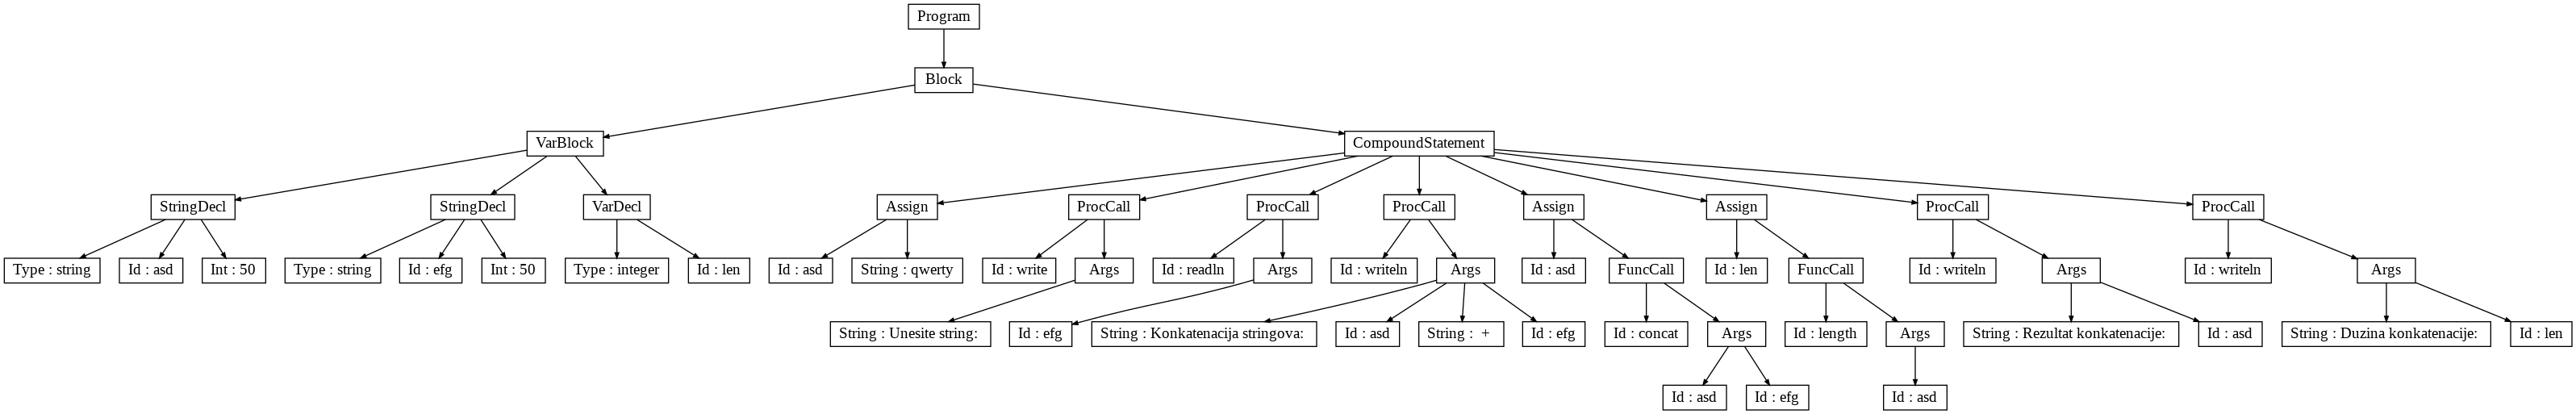

In [ ]:
test_id = 10
#path = f'/content/drive/Shared drives/Materijali 2020 2021/5. semestar/Programski prevodioci/Vezbe/Projekat/Datoteke/pas/test{test_id}.pas'
path = f'/content/drive/My Drive/Prevodioci projekat/pas/test{test_id}.pas'
with open(path, 'r') as source:
    text = source.read()

    lexer = Lexer(text)
    tokens = lexer.lex()
    
    parser = Parser(tokens)
    ast = parser.parse()

    grapher = Grapher(ast)
    img = grapher.graph()

Image(img)
 